Cross Validation Scores:  [0.98845202 0.98927688 0.98955183 0.98762717 0.98845202]
Average CV Score:  0.9886719824030795
Best Parameters: {'max_depth': 170, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 3}


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1653
           1       0.99      0.99      0.99      1984

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



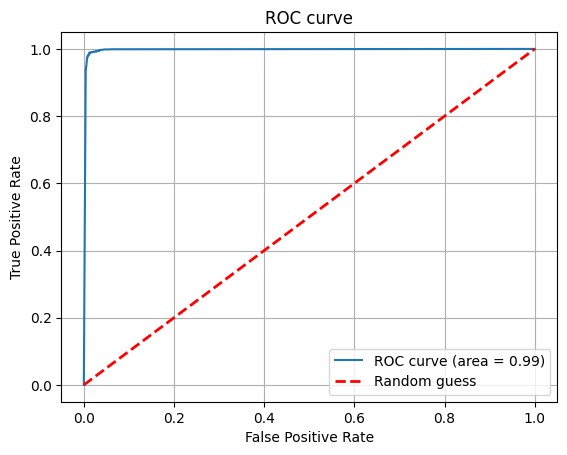

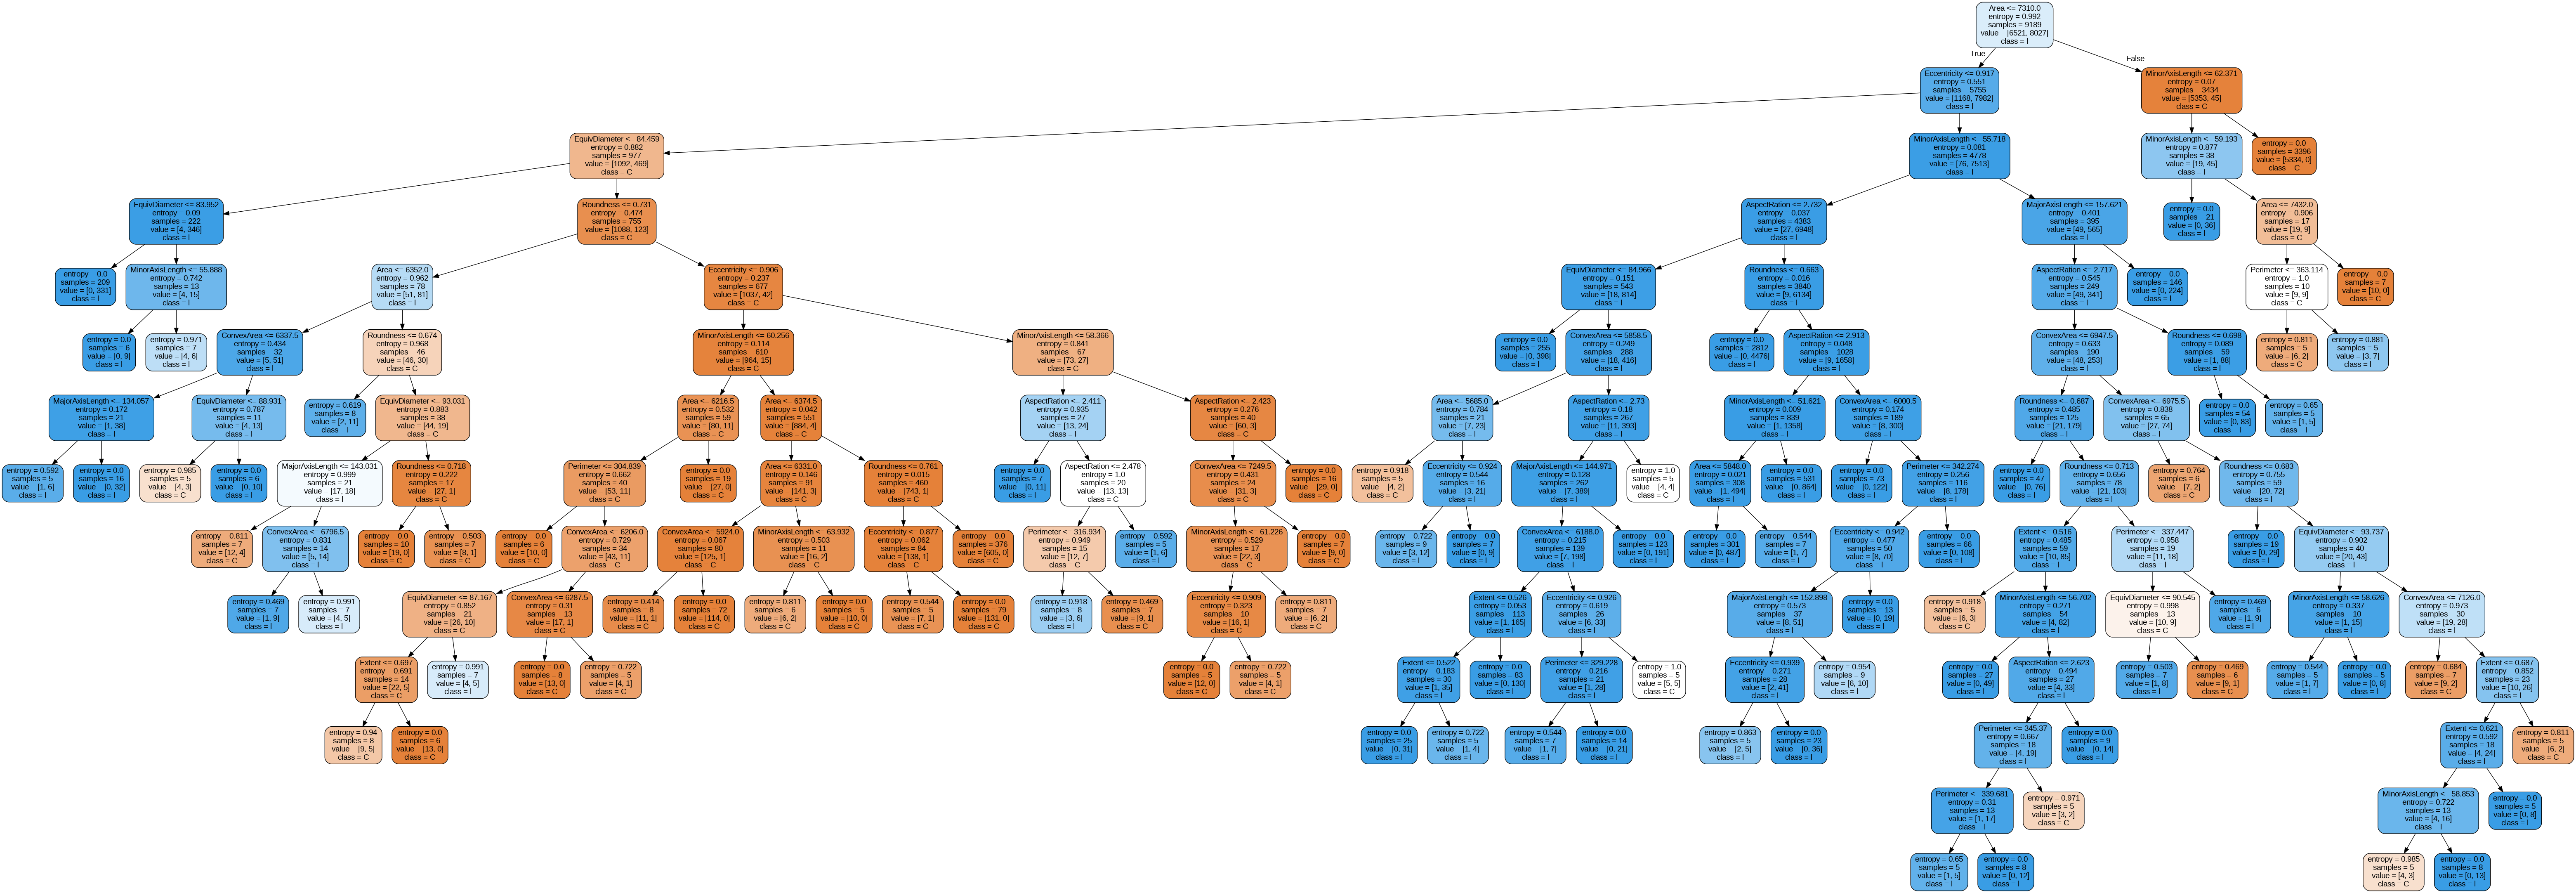

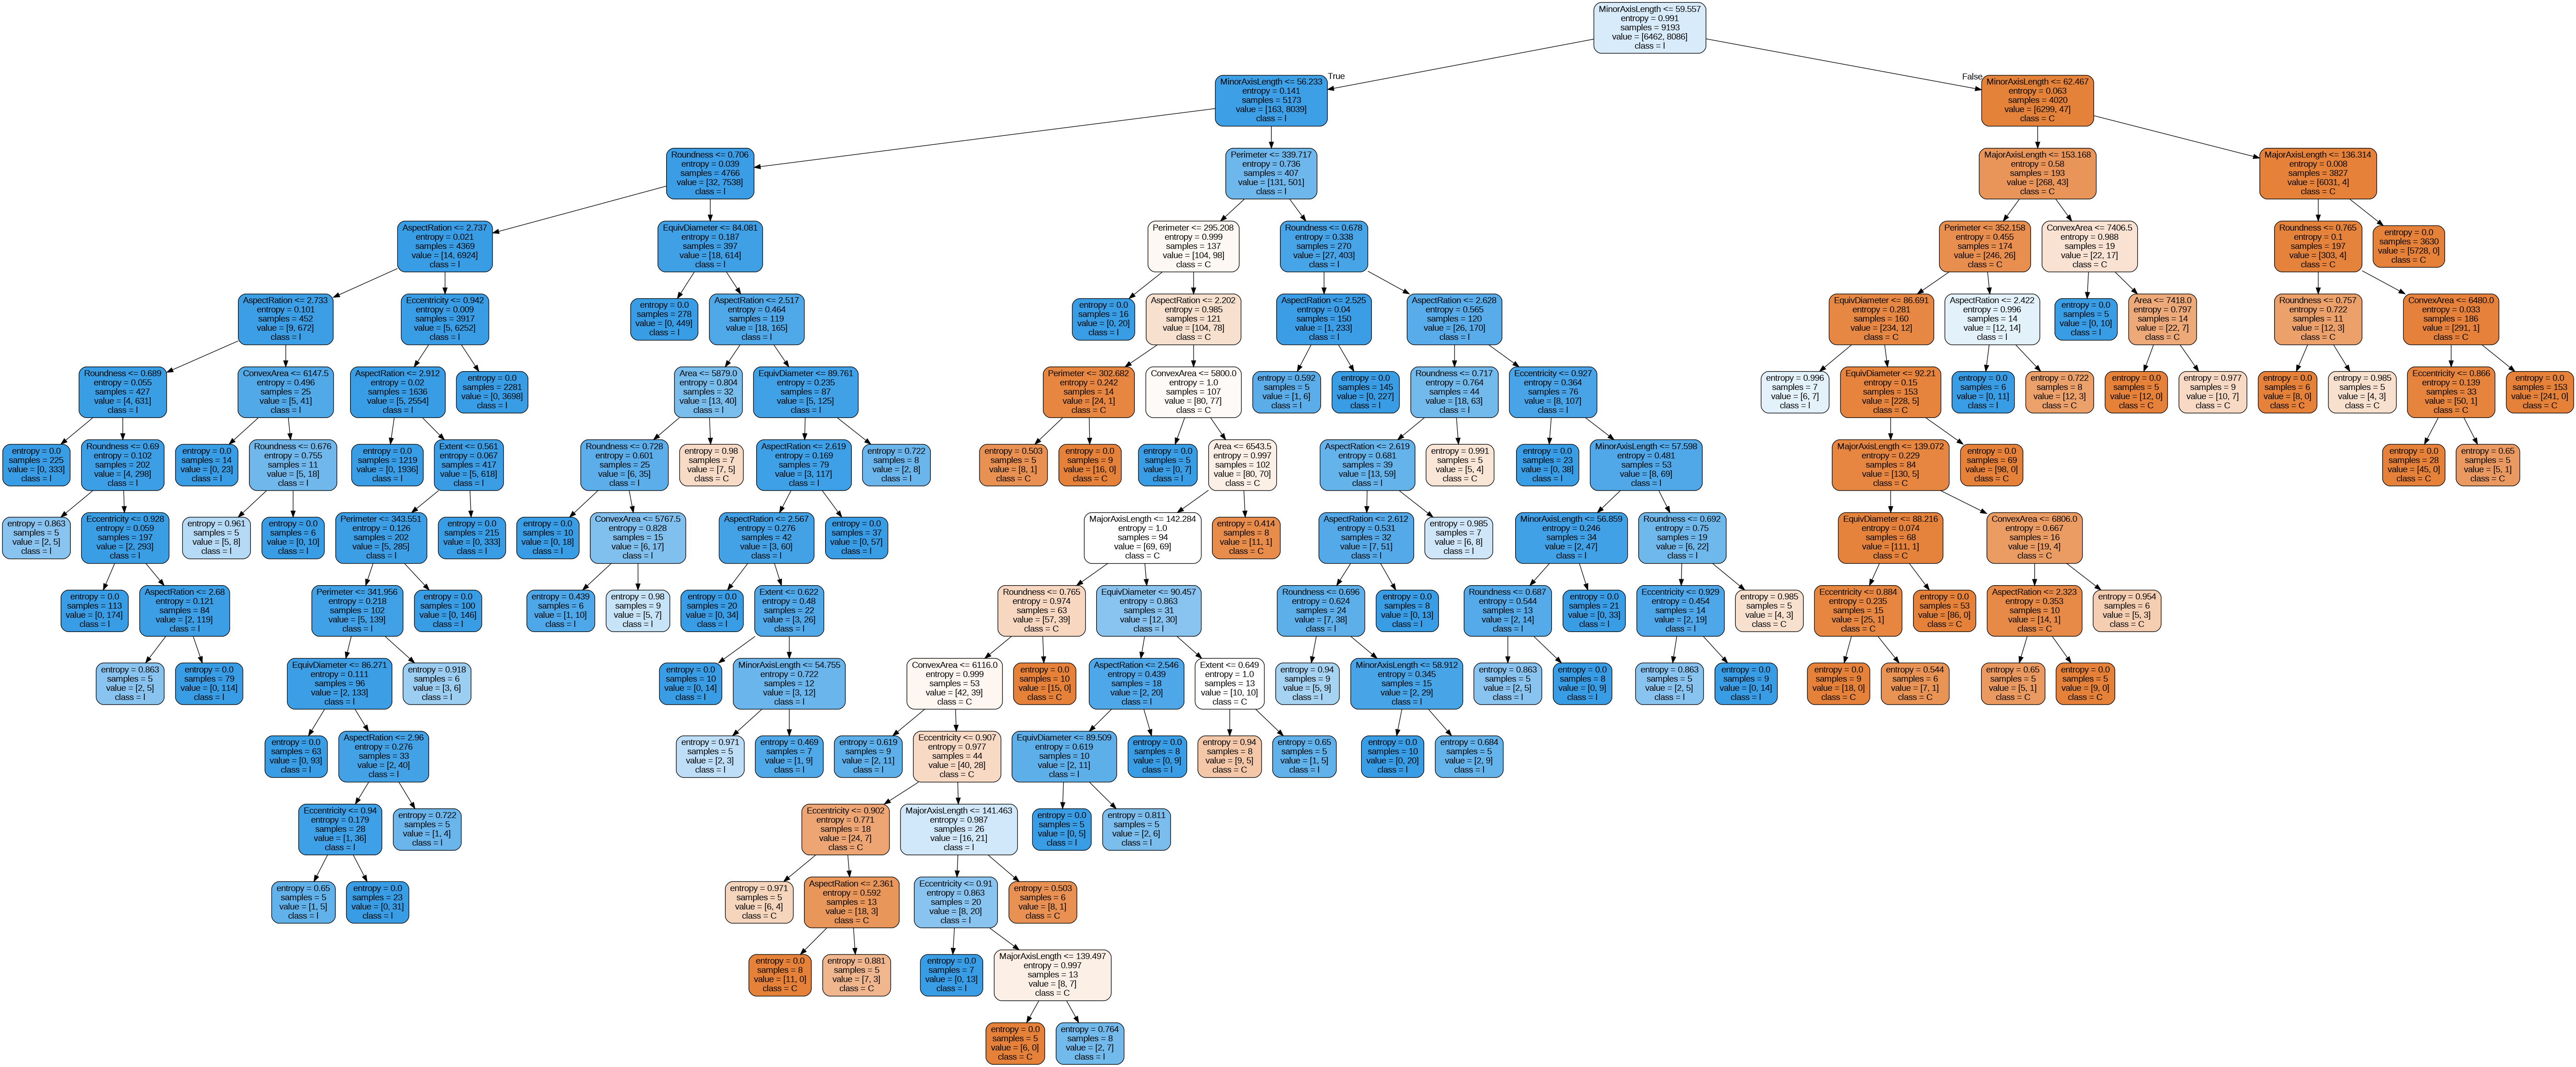

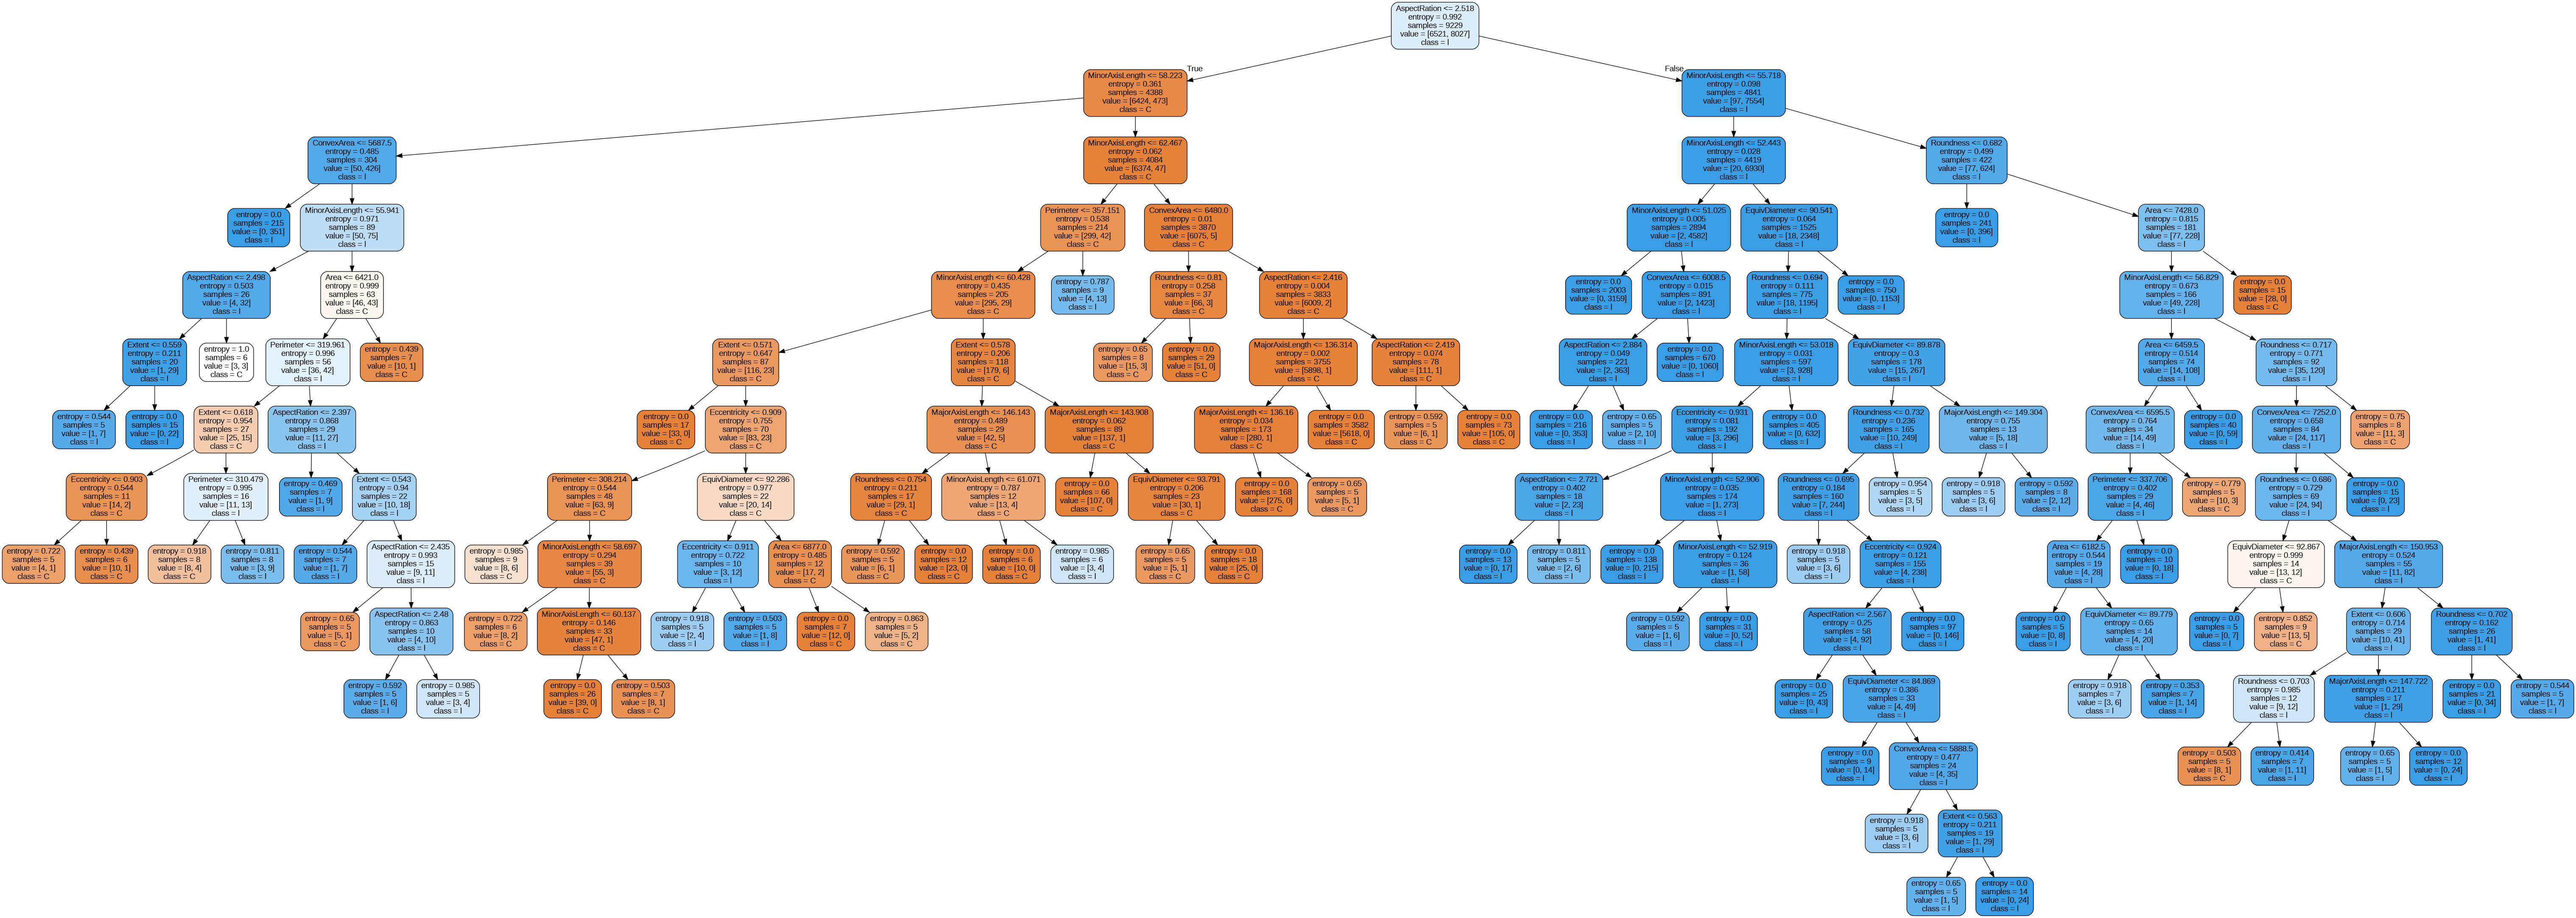

In [1]:
import graphviz
import pandas as pd  
import numpy as np  
from PIL import Image
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit  
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %score)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

dataset=pd.read_csv("https://raw.githubusercontent.com/phattarin-kitbumrung/machinelearning-python/dataset/main/rice.csv")

# train & test set
x = dataset.drop(['id', 'Class'], axis=1)
y = dataset['Class']
# dividing dataset in to train test 80% - 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# training
param_grid = {
    'n_estimators': np.linspace(2, 5, 10, dtype = int),
    'max_depth': [170, 180, 190, 200, 210, 220],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4, 5]
}
model = GridSearchCV(estimator = RandomForestClassifier(criterion = 'entropy', bootstrap = True), param_grid = param_grid, cv = 5)
shuffle_split = ShuffleSplit(train_size=0.8, test_size=0.2, n_splits = 5)
cross_validation_score = cross_val_score(model, x, y, cv = shuffle_split)
print("Cross Validation Scores: ", cross_validation_score)
print("Average CV Score: ", cross_validation_score.mean())
model.fit(x_train,y_train)
print('Best Parameters:', model.best_params_)
print("\n")

# test
y_pred=model.predict(x_test)

# result
y_pred_proba = model.predict_proba(x_test)
score = model.score(x, y)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_pred_proba[:, 1])

# Plot Tree
for index in range(0,len(model.best_estimator_)):
  tree_dot = export_graphviz(model.best_estimator_.estimators_[index], out_file=None, feature_names=x.keys(), class_names='Class', rounded=True, filled=True)
  graph = graphviz.Source(tree_dot, format="png")
  graph.render('estimator' + str(index))
  print("\n")
  img = Image.open('estimator' + str(index) + ".png")
  img.show()
